#  Predicting the Sale of Bulldozers 🚜 using Machine Learnin

In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

## 1. Problem Defination 

> How well can we predict the future sale price of bulldozer, given its characteristics and previous example of how much similar bulldozers have been sold for??

## 2. Data

> The data is downloaded from the Kaggle Bulubook for Bulldozers competition .https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets:

* `Train.csv` is the training set, which contains data through the end of 2011.

* `Valid.csv` is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.

* `Test.csv` is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation

> The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

**Note :** The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

## 4. Features

Kaggle provides a data dictonary detailing all of the features of the dataset. You can view in data folder named - `Data Dictonary`

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
# Importing the training and validation sets
df = pd.read_csv('data/TrainAndValid.csv',
                 low_memory = False)
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,11/16/2006 0:00,3/26/2004 0:00,2/26/2004 0:00,5/19/2011 0:00,7/23/2009 0:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

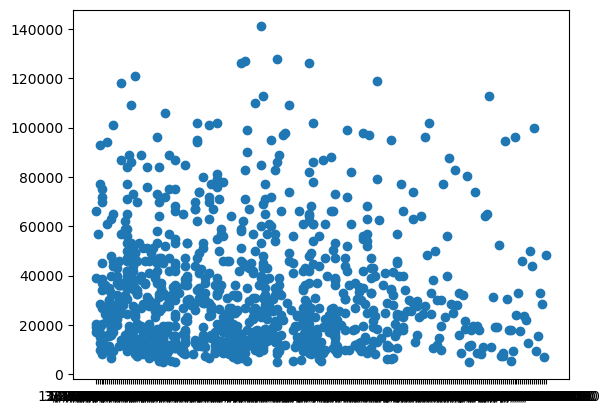

In [6]:
# Ploting the saledate and saleprice
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]);

In [7]:
df['saledate'][:100]

0     11/16/2006 0:00
1      3/26/2004 0:00
2      2/26/2004 0:00
3      5/19/2011 0:00
4      7/23/2009 0:00
           ...       
95    12/15/2005 0:00
96     1/29/2004 0:00
97     9/18/2008 0:00
98     11/3/2005 0:00
99      6/1/2006 0:00
Name: saledate, Length: 100, dtype: object

## Parsing dates

* In the above graph you can see in x-axis the dates are merged
* you can sove and imporve by `Prasing dates`

When we work with time series data, we want to enrich the time & date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the `parase_dates` parameter,

In [8]:
# Import the data again but this time with parse dates

df = pd.read_csv('data/TrainAndValid.csv',
                 low_memory = False,
                 parse_dates = ['saledate'])

In [9]:
df['saledate'][:100]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
        ...    
95   2005-12-15
96   2004-01-29
97   2008-09-18
98   2005-11-03
99   2006-06-01
Name: saledate, Length: 100, dtype: datetime64[ns]

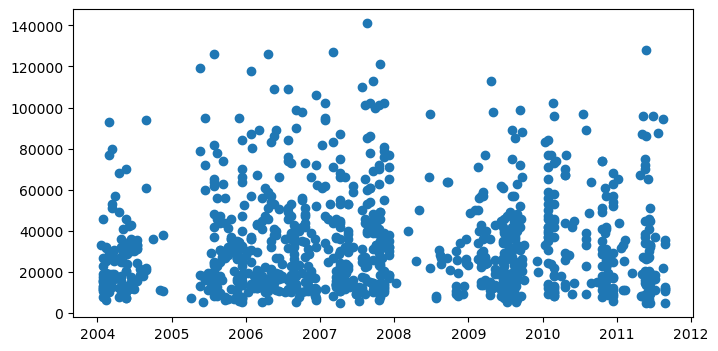

In [10]:
fig, ax = plt.subplots(figsize = (8,4))
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]);

In [11]:
# When there are too many rows then df.head() will truncate(...) it
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# But we can to Tranpose(T) to view every row
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [13]:
df['saledate'].head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sorting the DataFrame by saledate

When workingt with time series data, it's a good idea to sort it by date.

In [14]:
# sorting the dataframe in date order
df.sort_values(by=['saledate'], inplace=True, ascending=True)

In [15]:
df['saledate'].head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [16]:
# Making the data frame copy
df_temp = df.copy()

## Add datetime parameters for `saledate` column

You can access the attributes of the datatime - https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DatetimeIndex.html

In [17]:
df_temp[:5].saledate

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [18]:
df_temp[:5].saledate.dt.year

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
Name: saledate, dtype: int32

In [18]:
df_temp[:5].saledate.dt.month 

205615    1
274835    1
141296    1
212552    1
62755     1
Name: saledate, dtype: int32

In [19]:
df_temp[:5].saledate.dt.day

205615    17
274835    31
141296    31
212552    31
62755     31
Name: saledate, dtype: int32

In [20]:
df_temp['saleYear'] = df_temp.saledate.dt.year
df_temp['saleMonth'] = df_temp.saledate.dt.month
df_temp['saleDay'] = df_temp.saledate.dt.day
df_temp['saleDayOfWeek'] = df_temp.saledate.dt.dayofweek
df_temp['saleDayOfYear'] = df_temp.saledate.dt.dayofyear

In [21]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [22]:
# Now we can drop the the saledate so that it has divided into 5parts and which are enough to train the model
df_temp.drop('saledate', axis=1, inplace=True)

In [23]:
# Check the values of different coloums 
df_temp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

In [24]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [25]:
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Convert string to categories

* One way we can turn all of our data into numbers is by converting then into pandas catgories

You can check the different datatypes compatible with pandas here:
https://pandas.pydata.org/docs/reference/api/pandas.api.types.is_string_dtype.html

In [26]:
for label, content in df_temp.items():
    print(f"\nlabel = {label} \ncontent = {content}")


label = SalesID 
content = 205615    1646770
274835    1821514
141296    1505138
212552    1671174
62755     1329056
           ...   
410879    6302984
412476    6324811
411927    6313029
407124    6266251
409203    6283635
Name: SalesID, Length: 412698, dtype: int64

label = SalePrice 
content = 205615     9500.0
274835    14000.0
141296    50000.0
212552    16000.0
62755     22000.0
           ...   
410879    16000.0
412476     6000.0
411927    16000.0
407124    55000.0
409203    34000.0
Name: SalePrice, Length: 412698, dtype: float64

label = MachineID 
content = 205615    1126363
274835    1194089
141296    1473654
212552    1327630
62755     1336053
           ...   
410879    1915521
412476    1919104
411927    1918416
407124     509560
409203    1869284
Name: MachineID, Length: 412698, dtype: int64

label = ModelID 
content = 205615     8434
274835    10150
141296     4139
212552     8591
62755      4089
          ...  
410879     5266
412476    19330
411927    17244
407124  

In [27]:
pd.api.types.is_string_dtype(df_temp['state'])

True

In [28]:
# For checking the all the sting items in the dataframe
for keys,values in df_temp.items():
    if pd.api.types.is_string_dtype(values):
        print(keys)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [29]:
pd.api.types.is_string_dtype(df_temp['Tip_Control'])

False

In [30]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [31]:
for col in df_temp.columns:
    if df_temp[col].dtype == 'object':
        print(col)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [32]:
for label, content in df_temp.items():
    if df_temp[label].dtype == 'object':
        df_temp[label] = content.astype('category').cat.as_ordered()

In [33]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [34]:
# When the stirngs are converted into category then it assign a value for the category

df_temp.state.cat.codes

# Now we can use this values to train out model but there are a lot of missing values.....

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [35]:
# Checking the how much Percent of the missing values are present in the data.
(df_temp.isna().sum()/len(df_temp)).round(2)*100

SalesID                      0.0
SalePrice                    0.0
MachineID                    0.0
ModelID                      0.0
datasource                   0.0
auctioneerID                 5.0
YearMade                     0.0
MachineHoursCurrentMeter    64.0
UsageBand                   82.0
fiModelDesc                  0.0
fiBaseModel                  0.0
fiSecondaryDesc             34.0
fiModelSeries               86.0
fiModelDescriptor           82.0
ProductSize                 52.0
fiProductClassDesc           0.0
state                        0.0
ProductGroup                 0.0
ProductGroupDesc             0.0
Drive_System                74.0
Enclosure                    0.0
Forks                       52.0
Pad_Type                    80.0
Ride_Control                63.0
Stick                       80.0
Transmission                54.0
Turbocharged                80.0
Blade_Extension             94.0
Blade_Width                 94.0
Enclosure_Type              94.0
Engine_Hor

## Filling the missing values

### 1. Fill numeric missing values

In [36]:
# Lets check the columns which have missing integer values
for column_name, column_data in df_temp.items():
    if column_data.isna().sum():  # Check if there are missing values
        if pd.api.types.is_numeric_dtype(column_data):
            print(column_name)

auctioneerID
MachineHoursCurrentMeter


In [37]:
# Filling the missing values with median
for column_name, column_data in df_temp.items():
    if column_data.isna().sum():
        if pd.api.types.is_numeric_dtype(column_data):
            # We are making columns where the data is missing in true/false for future result
            df_temp[column_name+'_is_missing'] = column_data.isna() 
            # Filling the missing values with the median of the data
            df_temp[column_name] = column_data.fillna(column_data.median())

In [38]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,0.0,0.0,0.0,0.0,0.0
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [39]:
df_temp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

### 2.Filling all the missing categorical values

In [40]:
# Check all the missing categorical value columns
for column_name, column_data in df_temp.items():
    if not pd.api.types.is_numeric_dtype(column_data):
        if column_data.isna().sum():
            print(column_name)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [41]:
# Checking the codes of the state column
pd.Categorical(df_temp['state']).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [1]:
# Filling the missing categorical values
for column_name, column_data in df_temp.items():
    if not pd.api.types.is_numeric_dtype(column_data):
        # Add the new column weather the column has missing data or not
        df_temp[column_name+'_is_missing'] = column_data.isna()
        # converting the categeriocal values into codes
        df_temp[column_name] = pd.Categorical(column_data).codes + 1

NameError: name 'df_temp' is not defined

In [43]:
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [44]:
df.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [45]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [46]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int32(5), int64(5), int8(40)
memory usage: 73.2 MB


## 5.Modelling 

We've done enough EDA(we could always do more) but let's start to do some model-driven EDA

In [47]:
%%time
# Lets build a machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs = -1,
                              random_state=42)

model.fit(df_temp.drop('SalePrice', axis = 1), df_temp['SalePrice'])

CPU times: user 13min 41s, sys: 5.42 s, total: 13min 46s
Wall time: 1min 51s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [48]:
model.score(df_temp.drop('SalePrice', axis = 1), df_temp['SalePrice'])

0.9875468079970562

### Spliting the data into training and validation


In [49]:
df_temp.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [75]:
df_temp.drop('auctioneerID_is_missing', axis = 1, inplace=True)

In [76]:
# Split the data into train and valid
df_valid = df_temp[df_temp['saleYear'] == 2012]
df_train = df_temp[df_temp['saleYear'] != 2012]

# Length of the spliting data

len(df_train),len(df_valid)

(401125, 11573)

In [77]:
# Spliting the data into x & y

x_train = df_train.drop('SalePrice', axis=1)
y_train = df_train["SalePrice"]

x_valid = df_valid.drop('SalePrice', axis=1)
y_valid = df_valid['SalePrice']

In [78]:
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((401125, 101), (11573, 101), (401125,), (11573,))

### Creating our custom Evaluation metric RMSLE(Root Mean Square Log Error)

In [79]:
# Creating evalution function
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_pred):
    """
    Calculate root mean square log error between the predictions and true labels.
    """
    
    return np.sqrt(mean_squared_log_error(y_test, y_pred))

# Create function to evalute model on a few different levels.
def show_score(model):
    train_preds = model.predict(x_train)
    valid_preds = model.predict(x_valid)
    
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, valid_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, valid_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, valid_preds)}
    
    return scores

## Testing our model on a subset  (to tune the hyperparameters)

In [80]:
# # This take a lot of time......
# %%time
# model = RandomForestRegressor(n_jobs=-1,
#                               random_state=42)

# model.fit(x_train, y_train)

In [81]:
len(x_train)

401125

In [82]:
# By settiing the max_sample as 50000 it will take only 50000 out of 401125
model = RandomForestRegressor(n_jobs = -1,
                              random_state = 42,
                              max_samples = 50000)
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': 50000,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [83]:
%%time
model.fit(x_train, y_train)

CPU times: user 2min 10s, sys: 1 s, total: 2min 11s
Wall time: 18 s


RandomForestRegressor(max_samples=50000, n_jobs=-1, random_state=42)

In [84]:
show_score(model)

{'Training MAE': 4291.753548569649,
 'Valid MAE': 6351.2149218007435,
 'Training RMSLE': 0.20540574596526484,
 'Valid RMSLE': 0.262756643956385,
 'Training R^2': 0.9140244868155498,
 'Valid R^2': 0.8662725751426886}

In [85]:
model1 = RandomForestRegressor(n_jobs = -1,
                              random_state = 42)
model1.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [86]:
show_score(model1)

{'Training MAE': 1578.50847997507,
 'Valid MAE': 6122.90263371641,
 'Training RMSLE': 0.08422625337668216,
 'Valid RMSLE': 0.25529780426185283,
 'Training R^2': 0.9875061877844383,
 'Valid R^2': 0.8725554506564722}

## Hyperparameter tuning with RandomSearchCV

In [89]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Creating the hyperparameter grid
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "log2"],
           "max_samples": [50000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                  random_state=42),
                            param_distributions = rf_grid,
                            n_iter = 10,
                            cv = 5,
                            verbose = True)

# Fit the model
rs_model.fit(x_train, y_train)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: user 22.8 s, sys: 3.54 s, total: 26.3 s
Wall time: 50.6 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'log2'],
                                        'max_samples': [50000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [90]:
show_score(rs_model)

{'Training MAE': 9567.919614470347,
 'Valid MAE': 11027.231839650245,
 'Training RMSLE': 0.41926128949750463,
 'Valid RMSLE': 0.43510588571537107,
 'Training R^2': 0.6448431707085639,
 'Valid R^2': 0.6537721139212138}

In [91]:
%%time
# These are found after 2hr of randmosearchCV 

ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42)

# Fit the data to our ideal model
ideal_model.fit(x_train, y_train)

CPU times: user 2min 22s, sys: 1.15 s, total: 2min 23s
Wall time: 20.7 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [92]:
# Score of our model
show_score(ideal_model)

{'Training MAE': 2958.418881722212,
 'Valid MAE': 5950.891668138763,
 'Training RMSLE': 0.14474180381222024,
 'Valid RMSLE': 0.24593129014333293,
 'Training R^2': 0.9587027946904867,
 'Valid R^2': 0.8820245434833338}

### We have to preprocess the data For fitting our model


In [93]:
df_test = pd.read_csv('data/Test.csv',
                      low_memory=False,
                      parse_dates=['saledate'])
df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,1999,1000,2004,2006,2005
MachineHoursCurrentMeter,3688.0,28555.0,6038.0,8940.0,2286.0
UsageBand,Low,High,Medium,High,Low
saledate,2012-05-03 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00
fiModelDesc,580G,936,EC210BLC,330CL,650K


In [94]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [95]:
# def preprocess_data(df):
#     """
#     Performs transformation on df and return transformed df.
#     """
#     df['saleYear'] = df.saledate.dt.year
#     df['saleMonth'] = df.saledate.dt.month
#     df['saleDay'] = df.saledate.dt.day
#     df['saleDayOfWeek'] = df.saledate.dt.dayofweek
#     df['saleDayOfYear'] = df.saledate.dt.dayofyear
    
#     df.drop('saledate', axis = 1, inplace = True)
    
#     # Filling the missing values with median
#     for column_name, column_data in df.items():
#         if pd.api.types.is_numeric_dtype(column_data):
#             if column_data.isna().sum():
#                 # We are making columns where the data is missing in true/false for future result
#                 df[column_name+'_is_missing'] = column_data.isna() 
#                 # Filling the missing values with the median of the data
#                 df[column_name] = column_data.fillna(column_data.median())
                
#         if not pd.api.types.is_numeric_dtype(column_data):
#             # Add the new column weather the column has missing data or not
#             df[column_name+'_is_missing'] = column_data.isna()
#             # converting the categeriocal values into codes
#             df[column_name] = pd.Categorical(column_data).codes + 1       
    
    
#     return df

def preprocess_data(df):
    """
    Performs transformation on df and returns transformed df.
    """
    # Ensure 'saledate' is in datetime format
    df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce')
    
    # Extract year, month, day, day of week, and day of year from the 'saledate' column
    df['saleYear'] = df['saledate'].dt.year
    df['saleMonth'] = df['saledate'].dt.month
    df['saleDay'] = df['saledate'].dt.day
    df['saleDayOfWeek'] = df['saledate'].dt.dayofweek
    df['saleDayOfYear'] = df['saledate'].dt.dayofyear
    
    # Drop the 'saledate' column
    df.drop('saledate', axis=1, inplace=True)
    
    # Filling the missing values with median and handling categorical data
    for column_name, column_data in df.items():
        if pd.api.types.is_numeric_dtype(column_data):
            # If there are missing values in numeric columns, fill them with the median
            if column_data.isna().sum():
                df[column_name + '_is_missing'] = column_data.isna()
                df[column_name] = column_data.fillna(column_data.median())
        else:
            # For non-numeric columns, convert to categorical and fill missing values
            df[column_name + '_is_missing'] = column_data.isna()
            df[column_name] = pd.Categorical(column_data).codes + 1
    
    return df


In [96]:
df_test = preprocess_data(df_test)
df_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True


In [97]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 101, dtype: int64

In [98]:
x_train.shape, df_test.shape # There is one column is missing in the df_test

((401125, 101), (12457, 101))

In [99]:
# The missing column is 
set(x_train.columns) - set(df_test.columns)

set()

In [100]:
# # So we can manully adjust the auctioneerID_is_missing
# df_test['auctioneerID_is_missing'] = False
# df_test.head()

Finally now our test dataframe has the same features as out training dataframe, we can make predictions

In [102]:
# Make the predictions on the test data
test_pred = ideal_model.predict(df_test)
test_pred

array([16741.32940524, 15881.28842805, 46085.34845078, ...,
       12681.01600869, 16036.75874758, 27092.42784993])

In [103]:
show_score(ideal_model)

{'Training MAE': 2958.418881722213,
 'Valid MAE': 5950.891668138763,
 'Training RMSLE': 0.14474180381222024,
 'Valid RMSLE': 0.24593129014333295,
 'Training R^2': 0.9587027946904867,
 'Valid R^2': 0.8820245434833338}

### Feature Importance

Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the **target variable** (SalePrice)

In [104]:
ideal_model.feature_importances_

array([3.40540676e-02, 1.83256585e-02, 4.53182802e-02, 2.07289088e-03,
       3.38785407e-03, 1.96946436e-01, 3.52485514e-03, 1.04130056e-03,
       4.33926852e-02, 4.11982935e-02, 7.00840466e-02, 4.92976239e-03,
       2.02796681e-02, 1.53975445e-01, 4.15491491e-02, 5.97044099e-03,
       4.35340541e-03, 1.97331430e-03, 3.47960444e-03, 6.15089837e-02,
       3.71981825e-04, 4.34941807e-05, 7.53407824e-04, 2.09007661e-04,
       8.97742762e-04, 2.36291071e-05, 2.44281616e-04, 1.07661952e-02,
       4.83514517e-03, 2.14908754e-03, 2.60728733e-03, 2.43664514e-03,
       4.54558320e-03, 1.27771980e-03, 7.61511268e-04, 1.47090811e-02,
       8.28317002e-04, 1.65712994e-02, 1.88089445e-04, 1.50601992e-03,
       8.09947854e-04, 8.93450795e-04, 1.32713699e-03, 5.73189774e-04,
       4.97048297e-04, 3.99164604e-04, 2.72084526e-04, 2.75267543e-03,
       8.07703371e-04, 2.07594732e-04, 7.79163971e-04, 7.32754524e-02,
       3.78112088e-03, 5.70695400e-03, 2.91506385e-03, 9.79398850e-03,
      

In [118]:
# Building a help function for plotting the above values
def plot_features(columns, importance, n=20):
    # Creating a dataframe for importance
    df_imp = (pd.DataFrame({'features': columns,
                           'feature_importances': importance})
             .sort_values('feature_importances', ascending=False)
             .reset_index(drop=True))
    
    # Plotting the data
    fig, ax = plt.subplots(figsize=(10,5))
    ax.barh(df_imp['features'][:n], df_imp['feature_importances'][:n])
    ax.set_ylabel("features")
    ax.set_xlabel("featuer_importance")
    ax.invert_yaxis()
    

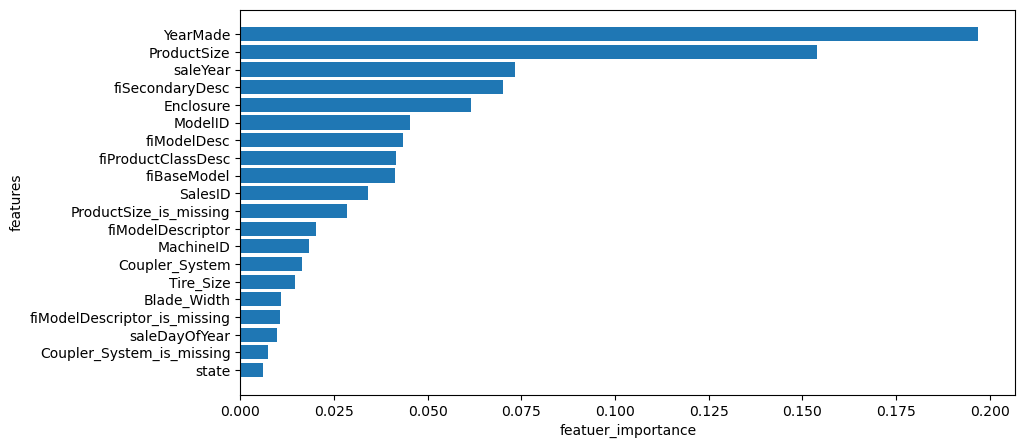

In [119]:
plot_features(x_train.columns, ideal_model.feature_importances_)

**Question to finish:** Why might knowing feature importance  of a trained machine learning model be helpful?
    
**Final Challenge:** What other machine learning models could you try on out dataset? Hit - `SKlearn Map`
    
    or try to use CatBoost.ai or XGBoost.ai